<a href="https://colab.research.google.com/github/Sitraka17/AMSE_25_Corporate_Strategy/blob/main/Porsche_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Porsche Group Revenue Projections Analysis

Historical Revenue (2018-2024):
2018: €25.8 billion
2019: €28.5 billion
2020: €28.7 billion
2021: €33.1 billion
2022: €37.6 billion
2023: €40.5 billion
2024: €42.1 billion

Projected Revenue (2025-2029):
   Year  Pessimistic Revenue  Neutral Revenue  Optimistic Revenue  \
0  2025                41.72            44.38               44.62   
1  2026                42.66            44.83               49.16   
2  2027                43.92            47.55               52.36   
3  2028                44.77            50.29               56.54   
4  2029                45.11            52.66               62.43   

   Pessimistic YoY Growth  Neutral YoY Growth  Optimistic YoY Growth  
0                   -0.01                0.05                   0.06  
1                    0.02                0.01                   0.10  
2                    0.03                0.06                   0.07  
3                    0.02                0.06        

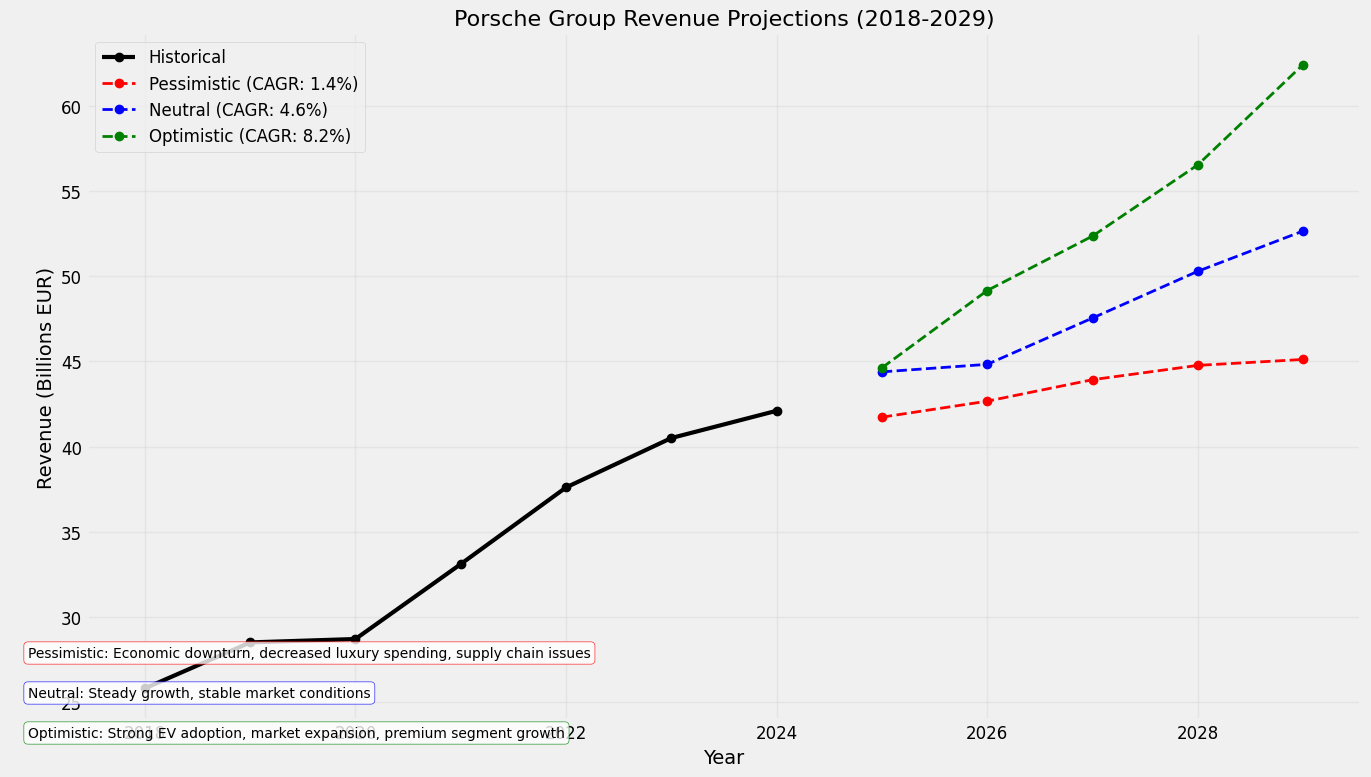

AttributeError: module 'matplotlib.pyplot' has no attribute 'font_manager'

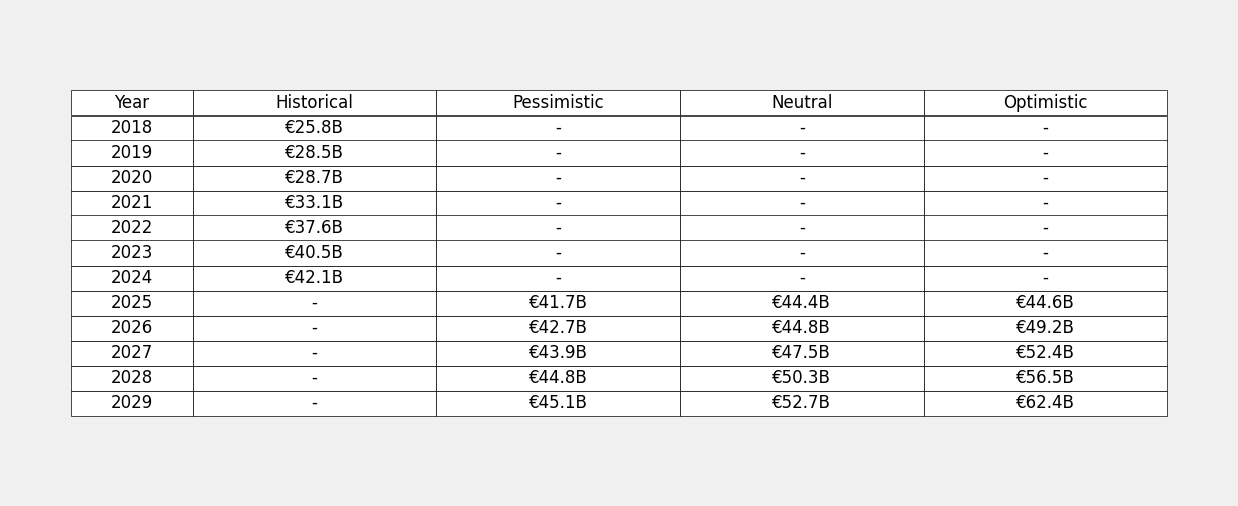

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set the style for better visualizations
plt.style.use('fivethirtyeight')
sns.set_palette("deep")

# Sample historical revenue data for Porsche Group (in billions of EUR)
# Based on approximate recent performance
historical_revenue = {
    2018: 25.8,
    2019: 28.5,
    2020: 28.7,  # COVID impact
    2021: 33.1,
    2022: 37.6,
    2023: 40.5,
    2024: 42.1
}

# Create DataFrame from historical data
df_historical = pd.DataFrame(list(historical_revenue.items()), columns=['Year', 'Revenue'])
df_historical['Revenue_Type'] = 'Historical'

# Function to generate projections
def generate_projections(years_to_project=5):
    current_year = 2024
    projection_years = range(current_year + 1, current_year + years_to_project + 1)

    # Growth rate scenarios
    scenarios = {
        'Pessimistic': {
            'growth_rate': np.linspace(0.01, 0.02, years_to_project),  # 1-2% growth
            'volatility': 0.01,  # Low volatility
            'description': 'Economic downturn, decreased luxury spending, supply chain issues'
        },
        'Neutral': {
            'growth_rate': np.linspace(0.03, 0.05, years_to_project),  # 3-5% growth
            'volatility': 0.015,  # Medium volatility
            'description': 'Steady growth, stable market conditions'
        },
        'Optimistic': {
            'growth_rate': np.linspace(0.06, 0.08, years_to_project),  # 6-8% growth
            'volatility': 0.02,  # Higher volatility
            'description': 'Strong EV adoption, market expansion, premium segment growth'
        }
    }

    # Get the latest historical revenue
    latest_revenue = historical_revenue[current_year]

    # Initialize dictionary to store projections
    projections = {}

    # Generate projections for each scenario
    for scenario, params in scenarios.items():
        revenues = [latest_revenue]

        for i, year in enumerate(projection_years):
            # Calculate growth with some randomness
            growth_factor = 1 + params['growth_rate'][i] + np.random.normal(0, params['volatility'])
            new_revenue = revenues[-1] * growth_factor
            revenues.append(new_revenue)

        # Store projections excluding the initial value (which is the latest historical)
        projections[scenario] = dict(zip(projection_years, revenues[1:]))

    return projections, scenarios

# Generate projections
projections, scenarios_info = generate_projections()

# Create DataFrame for projections
projection_data = []
for scenario, data in projections.items():
    for year, revenue in data.items():
        projection_data.append([year, revenue, scenario])

df_projections = pd.DataFrame(projection_data, columns=['Year', 'Revenue', 'Revenue_Type'])

# Combine historical and projection data
df_combined = pd.concat([df_historical, df_projections])

# Calculate compound annual growth rate (CAGR) for each scenario
def calculate_cagr(start_value, end_value, years):
    return (end_value / start_value) ** (1 / years) - 1

cagr_data = {}
for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
    scenario_data = df_projections[df_projections['Revenue_Type'] == scenario]
    start_year = min(scenario_data['Year'])
    end_year = max(scenario_data['Year'])
    start_value = historical_revenue[2024]  # Last historical value
    end_value = scenario_data[scenario_data['Year'] == end_year]['Revenue'].values[0]
    years = end_year - 2024

    cagr = calculate_cagr(start_value, end_value, years)
    cagr_data[scenario] = cagr

# Plot the projections
plt.figure(figsize=(14, 8))

# Historical data
historical_years = df_historical['Year']
historical_revenue_values = df_historical['Revenue']
plt.plot(historical_years, historical_revenue_values, 'o-', linewidth=3, color='black', label='Historical')

# Projections by scenario
colors = {'Pessimistic': 'red', 'Neutral': 'blue', 'Optimistic': 'green'}
for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
    scenario_data = df_projections[df_projections['Revenue_Type'] == scenario]
    plt.plot(scenario_data['Year'], scenario_data['Revenue'], 'o--', linewidth=2,
             color=colors[scenario], label=f"{scenario} (CAGR: {cagr_data[scenario]:.1%})")

plt.title('Porsche Group Revenue Projections (2018-2029)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue (Billions EUR)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate with scenario descriptions
y_pos = max(df_combined['Revenue']) * 0.7
for i, (scenario, info) in enumerate(scenarios_info.items()):
    plt.annotate(f"{scenario}: {info['description']}",
                 xy=(0.02, 0.15 - i*0.05),
                 xycoords='figure fraction',
                 fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors[scenario], alpha=0.8))

# Generate a detailed analysis report
def generate_financial_report(historical, projections, cagr_data):
    report = pd.DataFrame()

    # Historical data summary
    historical_growth = []
    for i in range(1, len(historical)):
        year = list(historical.keys())[i]
        prev_year = list(historical.keys())[i-1]
        growth = (historical[year] / historical[prev_year]) - 1
        historical_growth.append(growth)

    avg_historical_growth = np.mean(historical_growth)

    # Create report structure
    years = sorted(list(set([year for scenario in projections.values() for year in scenario.keys()])))

    # Initialize the DataFrame with years
    report['Year'] = years

    # Add revenue projections for each scenario
    for scenario in projections.keys():
        scenario_data = projections[scenario]
        report[f'{scenario} Revenue'] = [scenario_data.get(year, None) for year in years]

    # Calculate year-over-year growth rates
    for scenario in projections.keys():
        growth_rates = []
        for i in range(len(years)):
            if i == 0:
                # First projected year compared to last historical year
                growth = (report[f'{scenario} Revenue'][i] / historical[2024]) - 1
            else:
                # Compare to previous projected year
                growth = (report[f'{scenario} Revenue'][i] / report[f'{scenario} Revenue'][i-1]) - 1
            growth_rates.append(growth)

        report[f'{scenario} YoY Growth'] = growth_rates

    # Add CAGR for each scenario
    report_summary = pd.DataFrame({
        'Scenario': list(projections.keys()),
        'CAGR (2024-2029)': [cagr_data[scenario] for scenario in projections.keys()],
        'Avg Historical Growth (2018-2024)': [avg_historical_growth] * len(projections)
    })

    return report, report_summary

# Generate the financial report
financial_report, report_summary = generate_financial_report(historical_revenue, projections, cagr_data)

# Display the results
print("Porsche Group Revenue Projections Analysis")
print("==========================================")
print(f"\nHistorical Revenue (2018-2024):")
for year, revenue in historical_revenue.items():
    print(f"{year}: €{revenue:.1f} billion")

print("\nProjected Revenue (2025-2029):")
print(financial_report.round(2))

print("\nFinancial Analysis Summary:")
print(report_summary.round(4))

# Display the plot
plt.tight_layout()
plt.show()

# Create a table visualization of the projections
plt.figure(figsize=(14, 6))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Format projection data for table display
table_data = []
table_data.append(['Year', 'Historical', 'Pessimistic', 'Neutral', 'Optimistic'])

for year in range(2018, 2030):
    row = [str(year)]

    # Historical
    if year in historical_revenue:
        row.append(f"€{historical_revenue[year]:.1f}B")
    else:
        row.append("-")

    # Projections
    if year > 2024:
        for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
            scenario_data = projections[scenario]
            if year in scenario_data:
                row.append(f"€{scenario_data[year]:.1f}B")
            else:
                row.append("-")
    else:
        row.extend(["-", "-", "-"])

    table_data.append(row)

# Create table
table = plt.table(
    cellText=table_data,
    cellLoc='center',
    loc='center',
    colWidths=[0.1, 0.2, 0.2, 0.2, 0.2]
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontproperties=plt.font_manager.FontProperties(weight='bold'))
        cell.set_facecolor('#4472C4')
        cell.set_text_props(color='white')
    elif col == 0:
        cell.set_text_props(fontproperties=plt.font_manager.FontProperties(weight='bold'))
        cell.set_facecolor('#8EA9DB')
    elif row % 2 == 0:
        cell.set_facecolor('#D9E1F2')

plt.suptitle('Porsche Group Revenue Projections (in Billions EUR)', fontsize=16, y=0.95)
plt.figtext(0.5, 0.01, 'Generated on ' + datetime.now().strftime("%Y-%m-%d"), ha='center')
plt.show()